# Pandas e CSV

Nesta análise vamos utilizar algumas funções e pontencialidades do pandas para analisar e ler bases de dados, de início utilizaremos arquivos CSV's e com eles faremos várias simulações, integrações de bases e uso de funções pandas que facilitam o dia à dia de quem trabalha na área.

- vamos ler uma base de dados real, com base nas vendas da empresa Contoso

##### Esta análise foi desenvolvida no curso de Python da Hastag Treinamentos

In [19]:
# importando a biblioteca
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')    # tivemos colocar o separador, por que o arquivo estaba separado por ';' e não por ',' como é o padrão do csv

vendas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


### Aplicação

O primeiro passo de toda análise, é entender o seu conjunto de dados e o que contém na sua base, se você possui valores nulos ou ausentes, exitem muitos modelos que são sensíveis à esses tipos de valores, precisamo observar de em nossa base possui valores estranhos, ou seja, valores que não condizem com a realidade daquela coluna. Ex: Na coluna idade temos 3 anos e na coluna peso 150kg, é algo bem estranho de isso acontecer.

A função info() do pandas nos proporciona um resumo bem detalhado da nossa base.

In [20]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


Precisamos prestar atenção no retorno das chamadas que fazemos, um exemplo, se pedimos ao nosso DataFrame **vendas_df['ID Cliente']** ele nos retornará uma serie do pandas, mas se chamamos dessa forma **vendas_df[['ID Cliente]]** ele nos retornará um dataFrame, isso é importante, por que existem funções que são aplicadas para séries do pandas e existem funções para o datframe, e podemos ver esses tipo de retorno com a função **type()**

In [21]:
# retornando uma serie do pandas
vendas_df['ID Cliente']

0          6825
1         18469
2         19730
3         29326
4         22617
          ...  
980637    10353
980638    31750
980639    12003
980640    25550
980641    28707
Name: ID Cliente, Length: 980642, dtype: int64

In [22]:
type(vendas_df['ID Cliente'])

pandas.core.series.Series

In [23]:
# retornando um dataframe do pandas
vendas_df[['ID Cliente']]

,ID Cliente
0,6825
1,18469
2,19730
3,29326
4,22617
...,...
980637,10353
980638,31750
980639,12003
980640,25550


In [24]:
type(vendas_df[['ID Cliente']])

pandas.core.frame.DataFrame

Pegando esse gancho podemos criar um novo dataFrame que possui apenas algumas colunas e alguns dados que vamos trabalhar naquele momento. Ex: digamos que queremo analisar as quantidades dos produtos vendidas e devolvidas, podemos criar um novo DF com apenas as 3 colunas que queremos analisar.

In [25]:
# criando um novo Df com apenas as colunas que serão analisadas no momento
produtos_qtd = vendas_df[['ID Produto', 'Quantidade Vendida', 'Quantidade Devolvida']]    # o nome das colunas tem que ser exatamente igual ao do seu conjunto de dados

produtos_qtd

,ID Produto,Quantidade Vendida,Quantidade Devolvida
0,981,9,1
1,1586,9,1
2,1444,13,1
3,1468,6,1
4,1106,4,1
...,...,...,...
980637,2490,120,0
980638,2488,120,0
980639,2511,80,0
980640,436,39,0


## Comparando, Tratando de Mesclando DataFrames

Dificilmente no dia à dia, iremos trabalhar com apenas uma base de dados que contenham todas informações, geralmente trabalharemos com várias bases e de diferentes fontes, csv, excel, banco de dados e etc. Agora faremos uso de várias bases, para integrá-las com a nossa. Se obeservarmos a nossa base acima possui vários ID's, isso já nos dá o sinal que esses IDs estão relacionados a outras tabelas(relacionamentos é uma das bases de banco de dados), com isso iremos fazer essas relações para dessa forma conseguirmos fazer outras análises.

- o método merge() será o responsável por fazer a conexão dessas relações

### Criando nossos dataframes

In [26]:
# as vezes precisamos mudar o encoding para a nossa base carregar corretamente
# no nosso caso tivemos que usar o encoding 'ISO-8859-1'
# caso não funcione com você, pode testar esses: 'latin1', 'utf-8', 'cp1252'


vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO-8859-1')
promocoes_df = pd.read_csv(r'Contoso - Promocoes.csv', sep=';', encoding='ISO-8859-1')

# para vermos um abaixo do outro, utilizaremos função display()

display(vendas_df)
display(produtos_df)
display(clientes_df)
display(lojas_df)
display(promocoes_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22
...,...,...,...,...,...,...,...,...,...
1685,SV DVD 12-Inch Player Portable M400 Black,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1602,35
1686,SV DVD 9-Inch Player Portable M300 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1606,35
1687,SV DVD 12-Inch Player Portable M400 Silver,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"82,77","179,99",1607,35
1688,SV DVD 9-Inch Player Portable M300 White,"6-hour rechargeable battery, 180-degree swivel...",Southridge Video,Southridge Video,Regular,"73,57","159,99",1611,35


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Promocao,Nome Promocao,Percentual Desconto,Data Inicio,Data Termino
0,1,Sem desconto,0,01/01/2017,31/12/2020
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018
5,6,Promoção de Primavera Asiática,"0,2",01/02/2017,30/04/2017
6,7,Promoção de Verão Asiático,"0,1",01/05/2017,30/06/2017
7,8,Promoção de Primavera Europeia,"0,07",01/02/2017,30/04/2017
8,9,Promoção Volta às Aulas Europeias,"0,1",01/08/2017,30/09/2017
9,10,Promoção de Férias Europeias,"0,2",01/10/2017,31/01/2018


Em nossas bases, podemos perceber que algumas colunas não fazem muito sentido e outras não usaremos para a análise no momento, então podemos criar um novo df usando apenas as colunas que queremos ou podemos usar a função **drop()** para para excluir essas colunas.

In [27]:
#clientes_df = clientes_df.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
#promocoes_df = promocoes_df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)
display(clientes_df)
display(promocoes_df)
display(clientes_df.info())

,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975
...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001


,ID Promocao,Nome Promocao,Percentual Desconto,Data Inicio,Data Termino
0,1,Sem desconto,0,01/01/2017,31/12/2020
1,2,Promoção de Primavera Americana,"0,05",01/01/2017,31/03/2017
2,3,Promoção Volta às Aulas Americanas,"0,1",01/07/2017,30/09/2017
3,4,Promoção Férias Escolares Americanas,"0,2",01/11/2017,31/12/2017
4,5,Promoção Férias Asiáticas,"0,15",01/11/2017,31/01/2018
5,6,Promoção de Primavera Asiática,"0,2",01/02/2017,30/04/2017
6,7,Promoção de Verão Asiático,"0,1",01/05/2017,30/06/2017
7,8,Promoção de Primavera Europeia,"0,07",01/02/2017,30/04/2017
8,9,Promoção Volta às Aulas Europeias,"0,1",01/08/2017,30/09/2017
9,10,Promoção de Férias Europeias,"0,2",01/10/2017,31/01/2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39504 entries, 0 to 39503
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID Cliente          39504 non-null  int64 
 1   Primeiro Nome       39504 non-null  object
 2   Sobrenome           39504 non-null  object
 3   E-mail              39504 non-null  object
 4   Genero              39504 non-null  object
 5   Numero de Filhos    39504 non-null  int64 
 6   Data de Nascimento  39504 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


None

In [28]:
# renomeando coluna de nome

vendas_df = vendas_df.rename(columns={'Primeiro Nome': 'Primeiro Nome Cliente'})

vendas_df

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


In [29]:
# segunda forma para fazermos as relações

clientes_df = clientes_df[['ID Cliente','Primeiro Nome', 'Sobrenome', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

lojas_df

,ID Loja,Nome da Loja
0,1,Loja Contoso Seattle No.1
1,2,Loja Contoso Seattle No.2
2,3,Loja Contoso Kennewick
3,4,Loja Contoso Bellevue
4,5,Loja Contoso Redmond
...,...,...
301,306,Loja Contoso Europe Online
302,307,Loja Contoso Asia Online
303,308,Loja Contoso North America Reseller
304,309,Loja Contoso Europe Reseller


Agora que temos todas as informações que queremos no momento, vamos mesclar as bases utilizando o merge, que recebe o dataframe que queremos mesclar e a coluna que faz referência ou seja a relação entre as bases.

In [30]:
# mesclando as bases

vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')

display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,Primeiro Nome,Sobrenome,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,Rurik,Brumfield,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,Rurik,Brumfield,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,Rurik,Brumfield,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,Rurik,Brumfield,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,Rurik,Brumfield,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso Bluetooth Notebook Mouse E70 Silver,Loja Contoso Orlando,Esteban,Downer,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso Expandable 3-Handset Cordless Phone Sy...,Loja Contoso Damascus No.1,Ruben,Alonso,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso Home Theater System 4.1 Channel M1400 ...,Loja Contoso New York No.1,Allix,Kuhnert,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso Dual USB Power Adapter - power adapter...,Loja Contoso New York No.1,Anne,Alvarez,anne5@adventure-works.com


### Agora podemos iniciar as demais Análises

Vamos utilizar mais funções pandas e também o plot do próprio pandas para analisarmos alguns gráficos e responderemoa algumas perguntas importantes para análise

#### Respondendo algumas perguntas que poderíamos ter

- **Qual cliente comprou mais vezes?**


In [31]:
# para responder a pergunta usaremos o value_counts() usando a coluna 'ID Cliente'

freq_clientes = vendas_df[['ID Cliente']].value_counts()

freq_clientes

ID Cliente
20009         56
16984         56
21485         56
13433         53
12297         53
              ..
504            1
38793          1
38381          1
34             1
17             1
Length: 38930, dtype: int64

<Axes: xlabel='ID Cliente'>

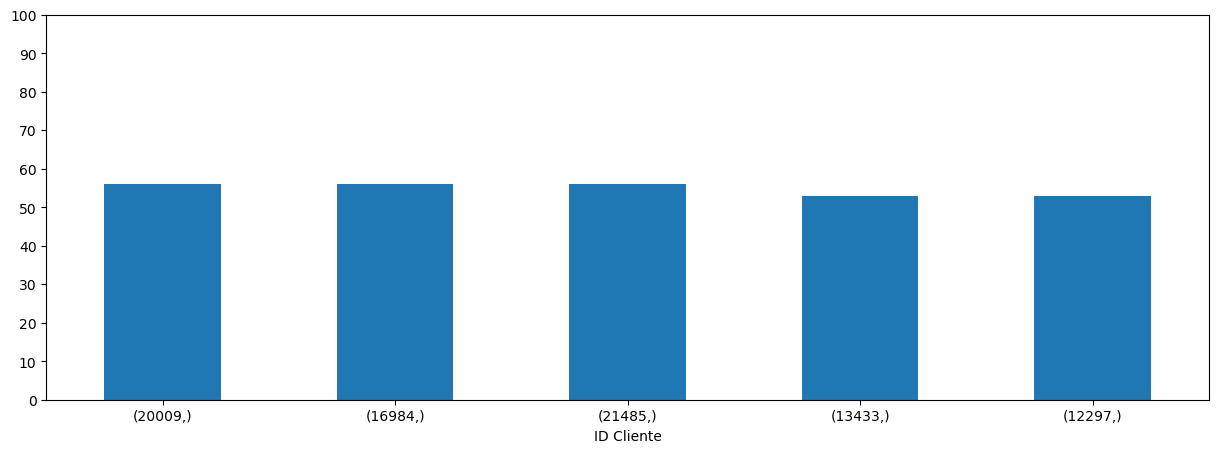

In [32]:
# como existem muitos clientes, plotar todos seria inviável, 
# portando plotamos um gráfico de barras verticais, com o top 5 clientes

freq_clientes[:5].plot(figsize=(15, 5), kind='bar', yticks=range(0,110, 10), rot=0.1)

- **Qual Loja mais vendeu?**

Para essa pergunta, poderíamos pensar em responder com o value_counts também, só que no momento, não queremos mais contar quantas lojas te como foi no caso acima, agora queremos agrupar essas lojas e somar os valores das suas vendas, dessa forma teremos a loja que mais vendeu.

Usaremos o método do **groupby()** para agrupar as lojas do nosso dataframe e em seguida utilizaremos o método **sum()**, para somar os valores das vendas.

In [34]:
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()
vendas_lojas = vendas_lojas[['Quantidade Vendida']]

display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065
...,...
Loja Contoso Yokohama,28023
Loja Contoso York,27164
Loja Contoso koln No.1,29046


Para saber a loja que mais vendeu agora que temos o nosso dataFrame com apenas os nomes das lojas e as suas respectivas quantidades vendidas somadas, podemos fazer de duas formas, a mais simples é ordenar o nosso Df a outra forma é utilizando os métodos abaixo:

- ordenar: sort_values()
- pegar o apenas o maior maior valor: max()
- pegar o índice de maior valor: idmax()


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<Axes: xlabel='Nome da Loja'>

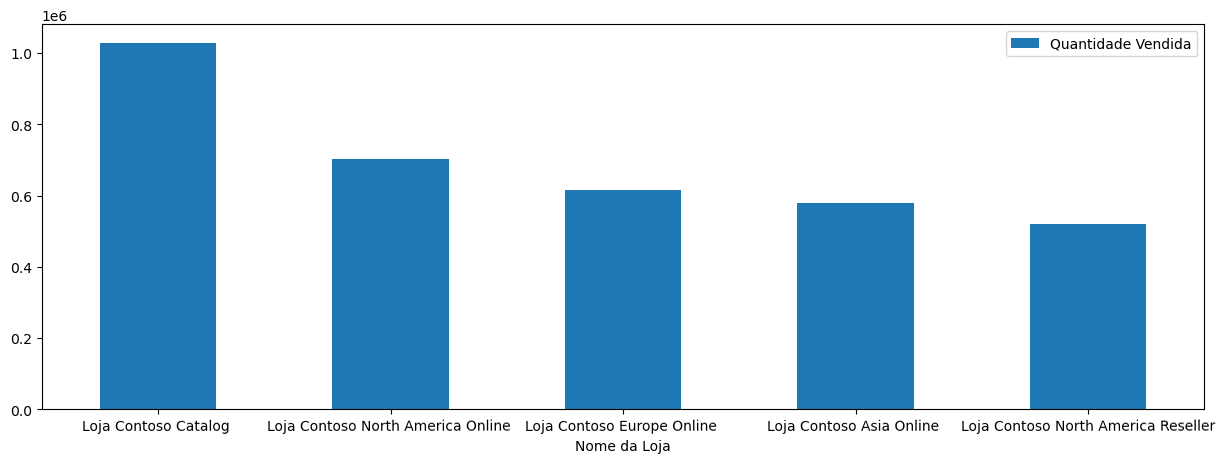

In [42]:
# ordenando o dataFrame
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida',  ascending=False)

display(vendas_lojas)

# plotando as top 5 lojas

vendas_lojas[:5].plot(figsize=(15, 5), kind='bar', rot=0.1)

In [44]:
# pegando o maior valor e seu índice

maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()

print(melhor_loja, maior_valor)

Loja Contoso Catalog  1029117


Da mesma forma e com o mesmo pensamento, poderíamos fazer o seguinte questionamento:

- **Qual Loja vendeu menos?**

In [45]:
menor_valor = vendas_lojas['Quantidade Vendida'].min()    # ou como está ordenado pegar apenas o último item
menor_loja = vendas_lojas['Quantidade Vendida'].idxmin()  # vendas_lojas[-1:]

print(menor_loja, menor_valor)

Loja Contoso Venezia  234
